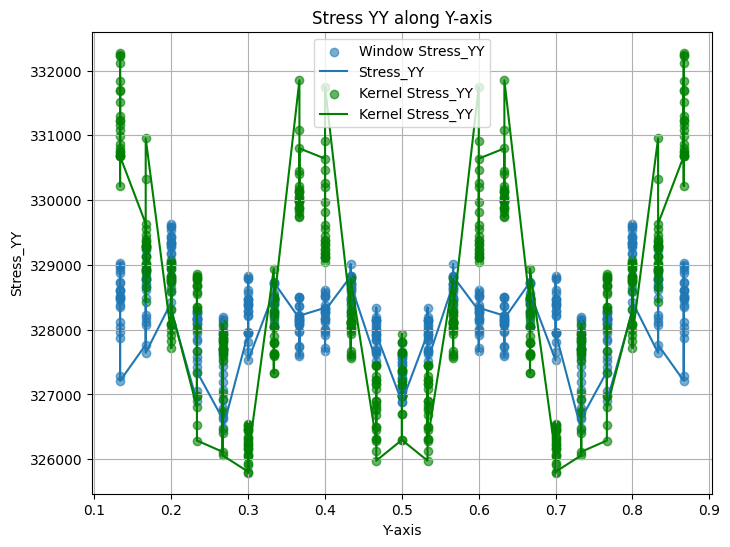

In [554]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .dat file, extracting the header
# Replace 'your_file.dat' with the actual filename
# mesh = 'irregular_mesh_good'
# mesh = 'grid_double_refined'
mesh = 'fused_alternating_rectangles_mesh'
with open(mesh+'_stress_window.dat', 'r') as file:
    header = file.readline().strip().split()  # Read and split the header line

data = np.loadtxt(mesh+'_stress_window.dat', skiprows=1)

# Use the header to identify columns
y_index = header.index('Y')  # Assuming 'y' is the label for the y-axis column
stress_yy_index = header.index('Stress_YY')  # Assuming 'stress_yy' is the label for the stress column

y = data[:, y_index]  # Extract y-axis values
stress_yy = data[:, stress_yy_index]  # Extract stress_yy values
# Load the data from the kernel file
with open(mesh+'_stress_kernel.dat', 'r') as kernel_file:
    kernel_header = kernel_file.readline().strip().split()  # Read and split the header line

kernel_data = np.loadtxt(mesh+'_stress_kernel.dat', skiprows=1)

# Use the header to identify columns
kernel_y_index = kernel_header.index('Y')  # Assuming 'Y' is the label for the y-axis column
kernel_stress_yy_index = kernel_header.index('Stress_YY')  # Assuming 'Stress_YY' is the label for the stress column

kernel_y = kernel_data[:, kernel_y_index]  # Extract y-axis values
kernel_stress_yy = kernel_data[:, kernel_stress_yy_index]  # Extract stress_yy values

# Plot stress_yy along the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(y, stress_yy, label='Window Stress_YY', alpha=0.6)
plt.plot(y, stress_yy, label='Stress_YY')
# Plot the kernel data along with the window data
plt.scatter(kernel_y, kernel_stress_yy, label='Kernel Stress_YY', alpha=0.6, color='green')
plt.plot(kernel_y, kernel_stress_yy, label='Kernel Stress_YY', color='green')
plt.xlabel('Y-axis')
plt.ylabel('Stress_YY')
plt.title('Stress YY along Y-axis')
plt.legend()
plt.grid(True)
plt.show()

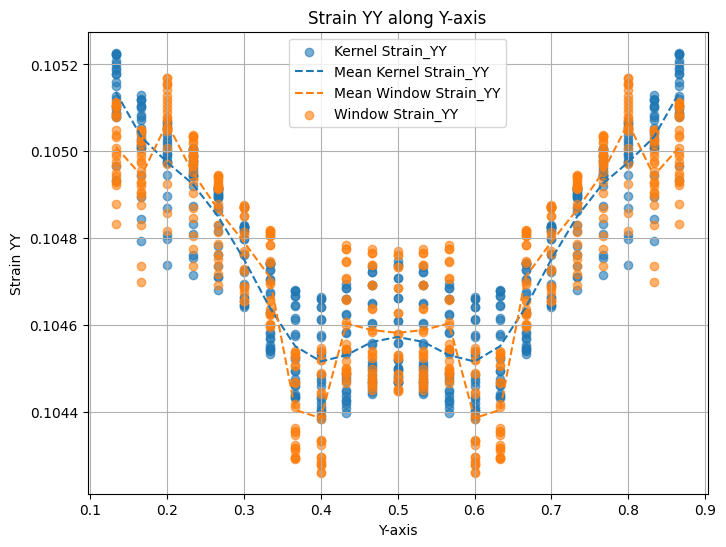

In [555]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .dat file, extracting the header
# Replace 'your_file.dat' with the actual filename
with open(mesh+'_strain_kernel.dat', 'r') as file:
    header = file.readline().strip().split()  # Read and split the header line

data = np.loadtxt(mesh+'_strain_kernel.dat', skiprows=1)

# Use the header to identify columns
y_index = header.index('Y')  # Assuming 'y' is the label for the y-axis column
stress_yy_index = header.index('Strain_YY')  # Assuming 'stress_yy' is the label for the stress column

y = data[:, y_index]  # Extract y-axis values
stress_yy = data[:, stress_yy_index]  # Extract stress_yy values
# Load the data from the previous window file
with open(mesh+'_strain_window.dat', 'r') as prev_file:
    prev_header = prev_file.readline().strip().split()  # Read and split the header line

prev_data = np.loadtxt(mesh+'_strain_window.dat', skiprows=1)

# Use the header to identify columns
prev_y_index = prev_header.index('Y')  # Assuming 'y' is the label for the y-axis column
prev_stress_yy_index = prev_header.index('Strain_YY')  # Assuming 'strain_yy' is the label for the stress column

prev_y = prev_data[:, prev_y_index]  # Extract y-axis values
prev_stress_yy = prev_data[:, prev_stress_yy_index]  # Extract stress_yy values

# Add the previous window data to the plot
# Plot stress_yy along the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(y, stress_yy, label='Kernel Strain_YY', alpha=0.6)
# Calculate the mean of stress_yy for each unique y value
unique_y = np.unique(y)
mean_stress_yy = [np.mean(stress_yy[y == val]) for val in unique_y]
# Plot the mean stress_yy for each y
plt.plot(unique_y, mean_stress_yy, label='Mean Kernel Strain_YY', linestyle='--')
# Calculate the mean of prev_stress_yy for each unique prev_y value
unique_prev_y = np.unique(prev_y)
mean_prev_stress_yy = [np.mean(prev_stress_yy[prev_y == val]) for val in unique_prev_y]
# Plot the mean prev_stress_yy for each prev_y
plt.plot(unique_prev_y, mean_prev_stress_yy, label='Mean Window Strain_YY', linestyle='--')
# plt.plot(y, stress_yy, label='Kernel Strain_YY')
plt.scatter(prev_y, prev_stress_yy, label='Window Strain_YY', alpha=0.6)
# plt.plot(prev_y, prev_stress_yy, label='Window Strain_YY')
plt.xlabel('Y-axis')
plt.ylabel('Strain YY')
plt.title('Strain YY along Y-axis')
plt.legend()
plt.grid(True)
plt.show()

Fitted kernel parameters: k = 2.9655795672220803e-07, c = 0.10476095224671132
Fitted window parameters: k = -1.3045722049001168e-08, c = 0.10474838319815494


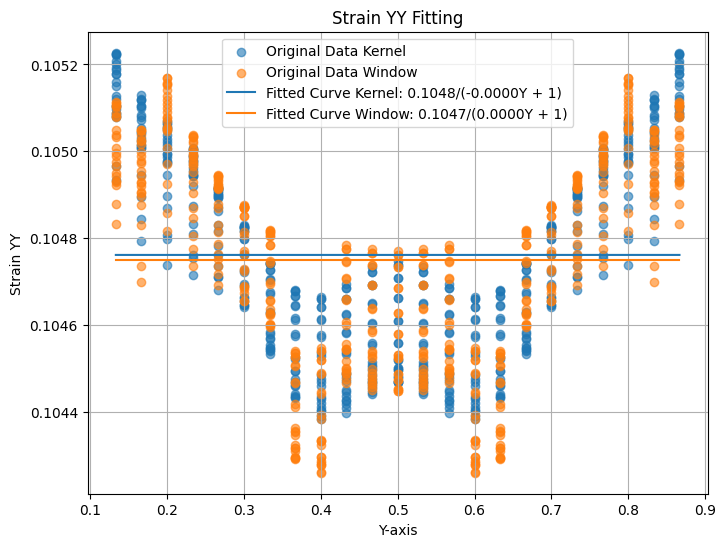

In [556]:
from scipy.optimize import curve_fit
import numpy as np
b = 1  # Ensure b is set to 1

# Update the function to fit
def strain_function(Y, k, c):
    return c / (-k * Y + 1)

# Perform the curve fitting
popt, pcov = curve_fit(strain_function, y, stress_yy)
prev_popt, prev_pcov = curve_fit(strain_function, prev_y, prev_stress_yy)

# Extract the fitted parameters
k, c = popt
p_k, p_c = prev_popt

print(f"Fitted kernel parameters: k = {k}, c = {c}")
print(f"Fitted window parameters: k = {p_k}, c = {p_c}")

# Generate fitted data for plotting
fitted_stress_yy = strain_function(y, k, c)
fitted_stress_yy_win = strain_function(prev_y, p_k, p_c)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(y, stress_yy, label='Original Data Kernel', alpha=0.6)
plt.scatter(prev_y, prev_stress_yy, label='Original Data Window', alpha=0.6)
# plt.plot(y, abs(stress_yy-fitted_stress_yy), label='Kernel Strain_YY')
# plt.plot(prev_y, abs(prev_stress_yy-fitted_stress_yy_win), label='Window Strain_YY')
plt.plot(y, fitted_stress_yy, label=f'Fitted Curve Kernel: {c:.4f}/({-k:.4f}Y + 1)')
plt.plot(y, fitted_stress_yy_win, label=f'Fitted Curve Window: {p_c:.4f}/({-p_k:.4f}Y + 1)')
plt.xlabel('Y-axis')
plt.ylabel('Strain YY')
plt.title('Strain YY Fitting')
plt.legend()
plt.grid(True)
plt.show()